* **Goal of the day:** Create many presets for Spring Network model
* **Coder:** Paul Valcke

In [1]:
import sys
sys.path.insert(0,  "../../" )
import chimes as chm
import numpy as np 

import matplotlib.pyplot as plt

import plotly.graph_objects as go
import numpy as np

In [ ]:

# Basic everyday packages
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import plotly
import copy

# Improving display of tables
from IPython.display import display,HTML,Markdown
from IPython.display import IFrame
from itables import init_notebook_mode,options
options.columnDefs = [{"className": "dt-left", "targets": "_all"}]
options.classes="display nowrap compact"
options.scrollY="400px"
options.scrollCollapse=True
options.paging=False
pd.set_option('display.max_colwidth', None)
pd.set_option("display.colheader_justify","left")

# Interactive matplotlib figures, use plt.close('all') when too many are open
init_notebook_mode(all_interactive=True)
%matplotlib widget

## Tomas Mazak's workaround for Latex plotly rendering
import plotly.graph_objs as go
from IPython.display import display, HTML
plotly.offline.init_notebook_mode()
display(HTML('<script type="text/javascript" async src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-MML-AM_SVG"></script>'))


In [ ]:
# Pytest for the library if you made changes to the code
!pytest "..\\..\\tests" -v --cov=chimes --cov-report html

In [ ]:
chm.create_models_readme('Spring_Network')

---------------------------

## Spring network madness ! 

Name: Single Heavy Node Oscillator

Description: Two nodes with a single spring between them. One node has a very high mass, and the spring is under compression. The second node will oscillate around its equilibrium position.

In [2]:
def showpreset(preset,Allpresets,Comment,Noutput=False):
    print('###', preset)
    print(Comment[preset])
    
    hub=chm.Hub('Spring_Network')
    hub.set_fields(**hub.supplements['dictNode2SpringMat'](Allpresets[preset]),verb=False)
    #hub.get_summary()

    hub.run(NtimeOutput=Noutput) 
    hub.supplements['plot_spring_network'](hub,sizemass=False)
    hub.supplements['plot_invariants'](hub)
    return hub

In [4]:
Allpresets = {}
Comment = {}

In [ ]:
preset= 'OneOscillation'
Comment[preset]= 'One moving mass on a spring, one direction'
Allpresets[preset]=dict(
    # Nodes
    Nnodes = 2, 
    x = np.array([0., 1.]), # initial positions
    y = np.array([0., 0.]),
    vx = np.array([0., 0.]), # initial velocities
    vy = np.array([0., 0.]), 
    m = np.array([10000., 1.]), # masses
    
    # Springs
    Nsprings = 1, # number of springs
    Node1 = np.array([0]), # first node index of the spring
    Node2 = np.array([1]), # second node index of the spring
    k = np.array([10.0]), # stiffness
    L0 = np.array([1.4]), # rest length
    damp = np.array([0.0]),

    
    dt=0.1,
    Tsim=30
)
hub= showpreset(preset,Allpresets,Comment)

In [ ]:
preset= 'OneDampedOscillation'
Comment[preset]= 'One moving mass on a spring, one direction'
Allpresets[preset] = copy.deepcopy(Allpresets['OneOscillation'])
Allpresets[preset]['damp']= np.array([0.1])
hub= showpreset(preset,Allpresets,Comment)


Name: Double-spring with one free node


Description: Three nodes in line with two loaded springs, the two external nodes have a very high mass 

In [ ]:
preset ='OneCircularOscillation'

Comment[preset]= 'One moving mass on a spring, around a fixed mass'
Allpresets[preset] = copy.deepcopy(Allpresets['OneOscillation'])
Allpresets[preset]['L0']= np.array([1])
Allpresets[preset]['k']= np.array([1])
Allpresets[preset]['vy']= np.array([0,1])
Allpresets[preset]['damp']= np.array([0])

hub=showpreset(preset,Allpresets,Comment)

In [ ]:
preset='Chaotic2DoneMass'
Comment[preset]= 'One moving mass between two fixed, under tension'
Allpresets[preset]=dict(
    # Nodes
    Nnodes = 3, 
    x = np.array([0, 1,2]), # initial positions
    y = np.array([0, 0,0]),
    vx = np.array([0, 0,0]), # initial velocities
    vy = np.array([0, 0,0]), 
    m = np.array([100000, 1,100000]), # masses

    # Springs
    Nsprings = 2, # number of springs
    Node1 = np.array([0,1]), # first node index of the spring
    Node2 = np.array([1,2]), # second node index of the spring
    k = np.array([10,10]), # stiffness
    L0 = np.array([0.6,1.4]), # rest length
    damp=0,
    Tsim=300,
    dt=0.05
)
hub=showpreset(preset,Allpresets,Comment,Noutput=100)



In [ ]:
preset='SpringCircle'
Comment[preset]= 'a circle of spring at position equilibrium, but with initial velocity lateral to the circle at the four cardinal points'

Nnodes =10
Nspring = Nnodes
Allpresets[preset]=dict(
    # Nodes
    Nnodes = Nnodes, 
    x = np.cos(2*np.pi*np.linspace(0,1,Nnodes,endpoint=False))*Nnodes/(2*np.pi),
    y = np.sin(2*np.pi*np.linspace(0,1,Nnodes,endpoint=False))*Nnodes/(2*np.pi),
    vx=  np.zeros(Nnodes),
    vy =  np.zeros(Nnodes),
    m = np.zeros(Nnodes)+1,

    # Springs
    Nspring = Nnodes,
    damp = 0,
    Node1 = np.arange(0,Nspring,1),
    Node2 = np.arange(1,Nspring+1,1)%Nspring,
    k = np.zeros(Nspring)+10,
    L0 = np.zeros(Nspring)+1,
    
    Tsim=100,
    dt=0.01
)
Allpresets[preset]['vy'][-1]=0.5
Allpresets[preset]['vx'][int(Nnodes/4)]=-0.5
Allpresets[preset]['vy'][int(Nnodes/2)]=-0.5
Allpresets[preset]['vx'][int(3*Nnodes/4)]=0.5

hub= showpreset(preset,Allpresets,Comment,Noutput=100)




In [ ]:
preset='SpringCircle with radial connexions'
Comment[preset]= 'same as spring circle, but with a reinforcement springs betweeen the cardinal points'

Nnodes =10
Nspring = Nnodes
Allpresets[preset]=dict(
    # Nodes
    Nnodes = Nnodes, 
    x = np.cos(2*np.pi*np.linspace(0,1,Nnodes,endpoint=False))*Nnodes/(2*np.pi),
    y = np.sin(2*np.pi*np.linspace(0,1,Nnodes,endpoint=False))*Nnodes/(2*np.pi),
    vx=  np.zeros(Nnodes),
    vy =  np.zeros(Nnodes),
    m = np.zeros(Nnodes)+1,

    # Springs
    Nspring = 2*Nnodes,
    damp = 0,
    Node1 = np.hstack((np.arange(0,Nnodes,1),np.arange(0,Nnodes,1)))%Nnodes,
    Node2 = np.hstack((np.arange(1,Nnodes+1,1),np.arange(int(Nnodes/2),Nnodes+int(Nnodes/2),1)))%Nnodes,
    k = np.hstack((np.zeros(Nnodes)+10,np.zeros(Nnodes)+10)),
    L0 = np.hstack((np.zeros(Nnodes)+1,np.zeros(Nnodes)+
                    np.pi)),
    Tsim=100,
    dt=0.05
)


print(Allpresets[preset]['Node1'])
print(Allpresets[preset]['Node2'])

Allpresets[preset]['vy'][0]=0.5
Allpresets[preset]['vx'][int(Nnodes/4)]=-0.5
Allpresets[preset]['vy'][int(Nnodes/2)]=-0.5
Allpresets[preset]['vx'][int(3*Nnodes/4)]=0.5

#for k,v in Allpresets[preset].items():
#    print(k,np.shape(v),v)

hub= showpreset(preset,Allpresets,Comment,Noutput=100)

#hub.get_summary()

### SpringCircle with central connexions
same as spring circle radial, but with a central connection of high mass
time step 10000 / 10000


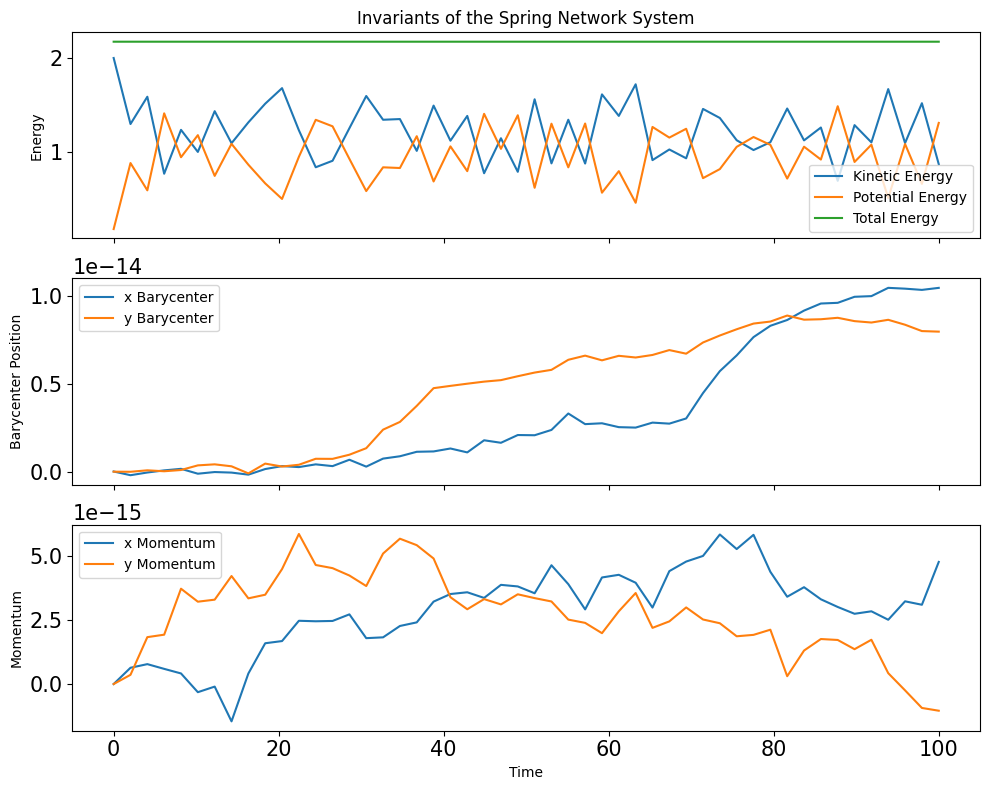

In [12]:
preset='SpringCircle with central connexions'
Comment[preset]= 'same as spring circle radial, but with a central connection of high mass'

Nnodes =20+1
Nspring = Nnodes
Allpresets[preset]=dict(
    # Nodes
    Nnodes = Nnodes, 
    x = np.hstack((np.cos(2*np.pi*np.linspace(0,1,Nnodes-1,endpoint=False))*(Nnodes-1)/(2*np.pi),0)),
    y = np.hstack((np.sin(2*np.pi*np.linspace(0,1,Nnodes-1,endpoint=False))*(Nnodes-1)/(2*np.pi),0)),
    vx=  np.zeros(Nnodes),
    vy =  np.zeros(Nnodes),
    m = np.zeros(Nnodes)+1,

    # Springs
    Nspring = 2*Nnodes,
    Node1 = np.hstack((np.arange(0,Nnodes-1,1)%(Nnodes-1),
                       np.arange(0,Nnodes-1,1))),
    Node2 = np.hstack((np.arange(1,Nnodes,1)%(Nnodes-1),
                       np.array((Nnodes-1)*[Nnodes-1]))),
    k = np.hstack((np.zeros(Nnodes-1)+10,
                   np.zeros(Nnodes-1)+10)),
    L0 = np.hstack((np.zeros(Nnodes-1)+1,
                    np.zeros(Nnodes-1)+np.pi)),
    damp=np.hstack((np.zeros(Nnodes-1)+0,
                    np.zeros(Nnodes-1)+0.0)),
    
    Tsim=100,
    dt=0.01
)

#for i in range(len(Allpresets[preset]['Node1'])):
#    print(Allpresets[preset]['Node1'][i],Allpresets[preset]['Node2'][i])

Speed =1


Allpresets[preset]['vy'][0]=Speed
Allpresets[preset]['vx'][int(Nnodes/4)]=-Speed
Allpresets[preset]['vy'][int(Nnodes/2)]=-Speed
Allpresets[preset]['vx'][int(3*Nnodes/4)]=Speed

#for k,v in Allpresets[preset].items():
#    print(k,np.shape(v),v)

hub= showpreset(preset,Allpresets,Comment,Noutput=50)

#hub.get_summary()

In [ ]:
preset = 'Bipartite Graph'
Comment[preset] = 'Six nodes split into two sets of three nodes each. Each node in one set is connected to all nodes in the other set with springs of equal stiffness. This demonstrates how interconnected clusters interact.'
Allpresets[preset] = dict(
    Nnodes=6,
    x=np.array([0., 1., 2., 0., 1., 2.]),
    y=np.array([0., 0., 0., 1., 1., 1.]),
    vx=np.array([0., 0., 0., 0., 0., 0.]),
    vy=np.array([0., 0., 0., 0., 0., 0.]),
    m=np.array([1., 1., 1., 1., 1., 1.]),
    Nsprings=9,
    Node1=np.array([0, 0, 0, 1, 1, 1, 2, 2, 2]),
    Node2=np.array([3, 4, 5, 3, 4, 5, 3, 4, 5]),
    k=np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]),
    L0=np.array([1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5]),
    dt=0.05,
    Tsim=30,
    damp=0,
)


hub= showpreset(preset,Allpresets,Comment,Noutput=100)


In [ ]:
preset='Grid compression-extension'
Comment[preset] = 'A 4x4 grid of nodes with uniform mass and stiffness, with all springs under slight tension except the two main diagonals, which are under compression.'

N = 5
Nnodes=N*N
Allpresets[preset] = dict(
    Nnodes=N*N,
    x=np.array([float(i) for i in range(N) for j in range(N)]),
    y=np.array([float(j) for i in range(N) for j in range(N)]),
    vx=np.array([0.]*Nnodes),
    vy=np.array([0.]*Nnodes),
    m=np.array([1.]*Nnodes),
    Nsprings=24,
    Node1=np.array([i for i in range(Nnodes-1) if (i+1) % N != 0] + [i for i in range(Nnodes-N)]),
    Node2=np.array([i+1 for i in range(Nnodes-1) if (i+1) % N != 0] + [i+N for i in range(Nnodes-N)]),
    k=np.array([1.0]*(Nnodes-N) + [1.2]*(Nnodes-N)),
    L0=np.array([1.2]*(Nnodes-N) + [0.8]*(Nnodes-N)),
    damp=0,
    dt=0.1,
    Tsim=50
)

# Adding wavey effect
#Allpresets[preset]['x'][:N]-=0.5

# The central node cannot move
#Allpresets[preset]['m'][int(Nnodes/2)]=10000

# The corners cannot move 
Allpresets[preset]['m'][np.array((0,N-1,Nnodes-N,Nnodes-1))]=10
print(Allpresets[preset]['m'])

hub= showpreset(preset,Allpresets,Comment,Noutput=100)

### Grid compression-fixed corner
A 4x4 grid of nodes with uniform mass and stiffness, with all springs under slight compressions, and corner of high mass
time step 500 / 500


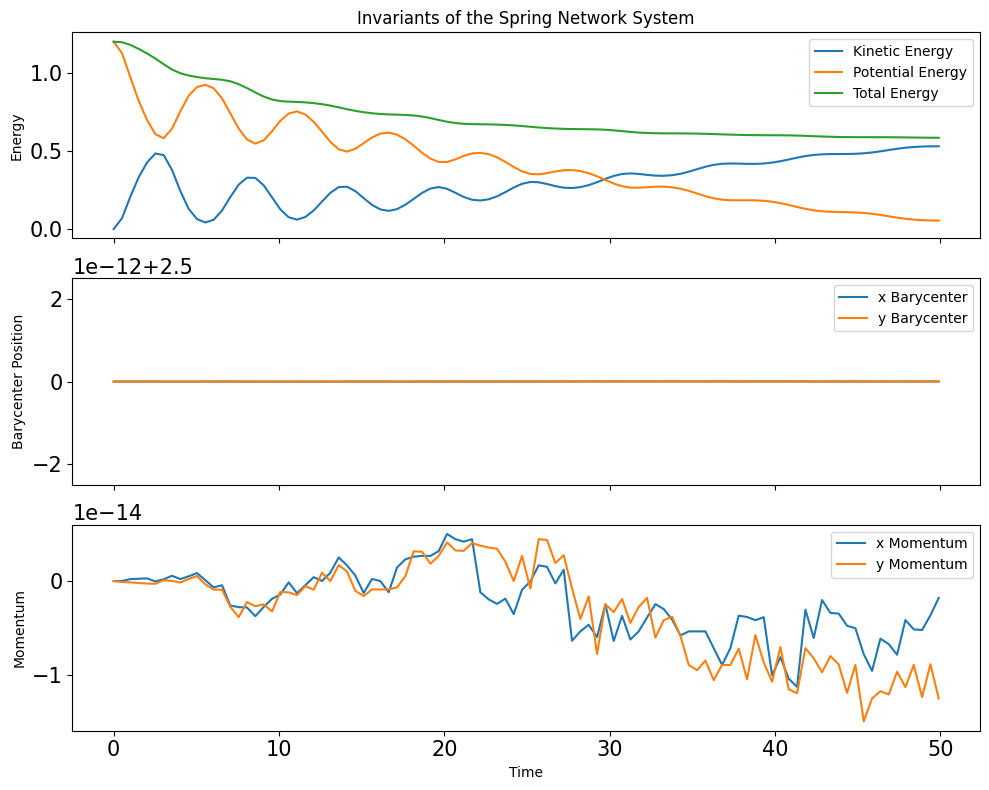

In [7]:
preset='Grid compression-fixed corner'
Comment[preset] = 'A 4x4 grid of nodes with uniform mass and stiffness, with all springs under slight compressions, and corner of high mass'

N = 6
Nnodes=N*N
Allpresets[preset] = dict(
    Nnodes=N*N,
    x=np.array([float(i) for i in range(N) for j in range(N)]),
    y=np.array([float(j) for i in range(N) for j in range(N)]),
    vx=np.array([0.]*Nnodes),
    vy=np.array([0.]*Nnodes),
    m=np.array([1.]*Nnodes),
    Nsprings=24,
    Node1=np.array([i for i in range(Nnodes-1) if (i+1) % N != 0] + [i for i in range(Nnodes-N)]),
    Node2=np.array([i+1 for i in range(Nnodes-1) if (i+1) % N != 0] + [i+N for i in range(Nnodes-N)]),
    k=np.array([1.0]*(Nnodes-N) + [1.]*(Nnodes-N)),
    L0=np.array([.8]*(Nnodes-N) + [0.8]*(Nnodes-N)),
    damp=0.1,
    dt=0.1,
    Tsim=50
)

# Adding wavey effect
#Allpresets[preset]['x'][:N]-=0.5

# The central node cannot move
#Allpresets[preset]['m'][int(Nnodes/2)]=10000

# The corners cannot move 
Allpresets[preset]['m'][np.array((0,N-1,Nnodes-N,Nnodes-1))]=1000

hub= showpreset(preset,Allpresets,Comment,Noutput=100)

### Pentagon Ring
Five nodes connected in a pentagon with springs of equal stiffness and length. One node is given an initial lateral speed, creating interesting wave patterns along the ring.
time step 300 / 300


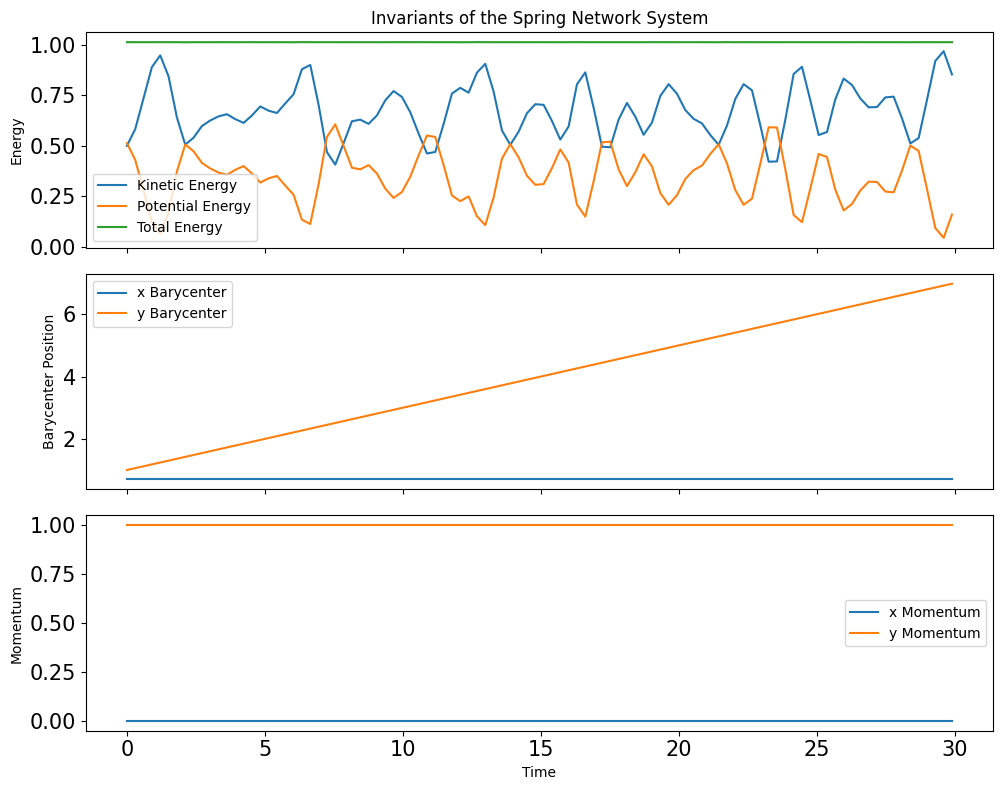

In [15]:
# Pentagon Ring
preset='Pentagon Ring'
Comment[preset] = 'Five nodes connected in a pentagon with springs of equal stiffness and length. One node is given an initial lateral speed, creating interesting wave patterns along the ring.'
Allpresets[preset] = dict(
    Nnodes=5,
    x=np.array([0., 1., 1.5, 1., 0.]),
    y=np.array([0., 0., 1., 2., 2.]),
    vx=np.array([0., 0., 0., 0., 0.]),
    vy=np.array([0., 1., 0., 0., 0.]),
    m=np.array([1., 1., 1., 1., 1.]),
    Nsprings=5,
    Node1=np.array([0, 1, 2, 3, 4]),
    Node2=np.array([1, 2, 3, 4, 0]),
    k=np.array([1.0, 1.0, 1.0, 1.0, 1.0]),
    L0=np.array([1.0, 1.0, 1.0, 1.0, 1.0]),
    dt=0.1,
    damp=0,
    Tsim=30
)

hub= showpreset(preset,Allpresets,Comment,Noutput=100)

### Whip
Whip with 10 nodes, a linear chain of nodes connected by springs with increasing stiffness, illustrating wave propagation through varying stiffness.
time step 2000 / 2000


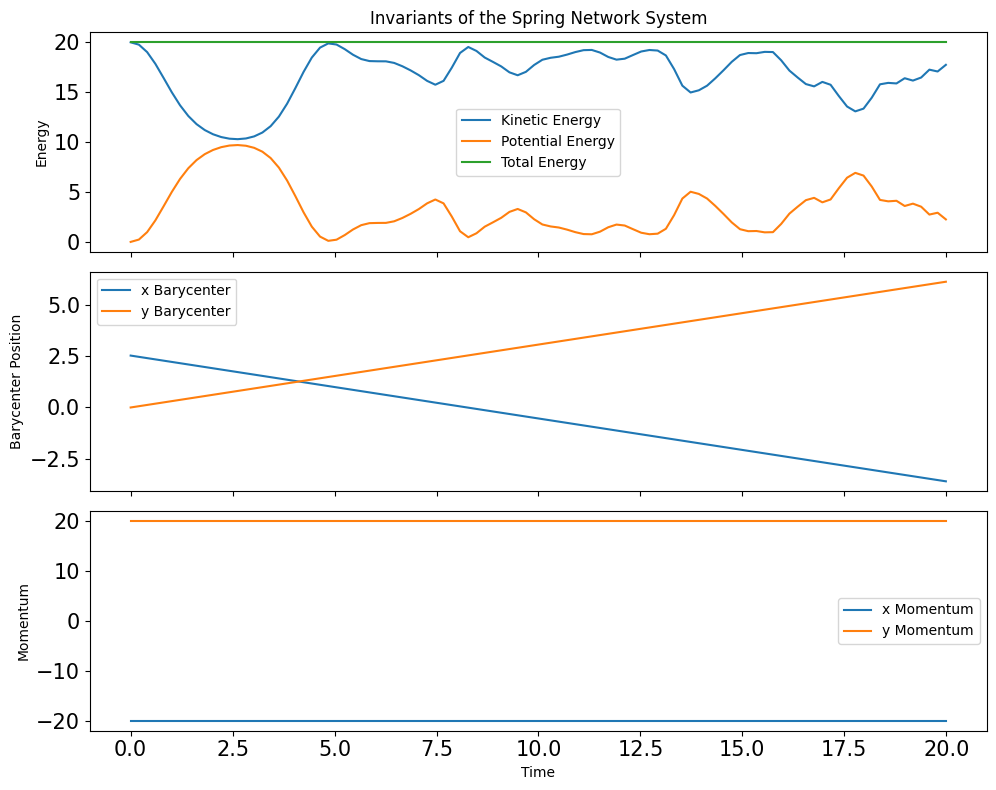

In [28]:
preset= 'Whip'

N = 10
Comment[preset] = f'Whip with {N} nodes, a linear chain of nodes connected by springs with increasing stiffness, illustrating wave propagation through varying stiffness.'
Allpresets[preset] = dict(
    # Nodes
    Nnodes = N,  # Number of nodes
    x = np.linspace(0, N-1, N),  # Initial positions in x, equally spaced
    y = np.zeros(N),  # Initial positions in y, all zero
    vx = np.zeros(N),  # Initial velocities in x, all zero
    vy = np.zeros(N),  # Initial velocities in y, all zero
    m = np.linspace(N,1,N),  # Masses of the nodes, all equal

    # Springs
    Nsprings = N-1,  # Number of springs
    Node1 = np.arange(N-1),  # First node index of each spring
    Node2 = np.arange(1, N),  # Second node index of each spring
    k = np.linspace(10.0, 10.0 + (N-2)*10.0, N-1),  # Stiffness of each spring, increasing linearly
    L0 = np.ones(N-1),  # Rest length of each spring, all 1.0
    damp=0,
    # Simulation parameters
    dt = 0.01,  # Time step
    Tsim = 20  # Total simulation time
)
Allpresets[preset]['m'][0]=20
Allpresets[preset]['vy'][0]=1
Allpresets[preset]['vx'][0]=-1

hub= showpreset(preset,Allpresets,Comment,Noutput=100)


In [21]:
np.linspace(N,1,N)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [ ]:
preset= 'guitar string'


Comment[preset] = f'A string with two anchor at each side, under tension, with an initial disturbance on position in the middle'

N = 50
perturbation = 0.7 # String plucked at 70% 0f its length

Allpresets[preset] = dict(
    # Nodes
    Nnodes = N,  # Number of nodes
    x = np.linspace(0, N-1, N),  # Initial positions in x, equally spaced
    y = np.zeros(N),  # Initial positions in y, all zero
    vx = np.zeros(N),  # Initial velocities in x, all zero
    vy = np.zeros(N),  # Initial velocities in y, all zero
    m = np.zeros(N)+1,  # Masses of the nodes, all equal

    # Springs
    Nsprings = N-1,  # Number of springs
    Node1 = np.arange(N-1),  # First node index of each spring
    Node2 = np.arange(1, N),  # Second node index of each spring
    k = np.ones(N-1),  # Stiffness of each spring, increasing linearly
    L0 = np.ones(N-1)*0.7,  # Rest length of each spring, all 1.0
    damp=0,
    # Simulation parameters
    dt = 0.01,  # Time step
    Tsim = 20  # Total simulation time
)
Allpresets[preset]['m'][0]= 100000
Allpresets[preset]['m'][-1]= 100000
Allpresets[preset]['y'][int(perturbation*N)]=1
#Allpresets[preset]['vx'][0]=-1

hub= showpreset(preset,Allpresets,Comment,Noutput=100)